<center><img src='./Figs/cs-logo.png' width=200></center>

<h6><center></center></h6>

<h1>
<hr style="border:none; height:3px;">
<center>Lab 1: Getting Started with OpenCV - Color Representation Spaces</center>
<hr style="border:none; height:3px;">
</h1>

## Foreword
The practical sessions for the Computer Vision course will be conducted using the [OpenCV](http://opencv.org/) library as well as the [scikit image](https://scikit-image.org/) one in the environment of your choice, and they will involve applications of various concepts covered in the lectures.  
OpenCV provides interfaces in C++, C, Python, and Java, allowing you to use the one that best suits your needs, with a preference for the Python interface. These notebooks use the Python interface, and the solutions will be provided in Python.

 


## Exercise 1: OpenCV's Hello World

To get started, you need to install the OpenCV library (version 4) on your computer. Numerous installation instructions are available on the official website:  
+ [Installation](http://opencv.org/), under the Documentation - Tutorials or Quick Start section.

You can also use the following commands:

  `! pip install opencv-python`

and 

   `! pip install opencv-contrib-python`

Once the installation is complete, you should be able to compile and run a program that opens and displays an image. An image in OpenCV is represented as a matrix: the **Mat** structure. A detailed explanation of this data structure is available in the [tutorial here](https://docs.opencv.org/4.7.0/d6/d6d/tutorial_mat_the_basic_image_container.html). In Python, it is represented as a numpy array. If you are not familiar with numpy, you can follow this excellent [tutorial](http://cs231n.github.io/python-numpy-tutorial/).

The code below demonstrates one way to load and display an image. Test it.


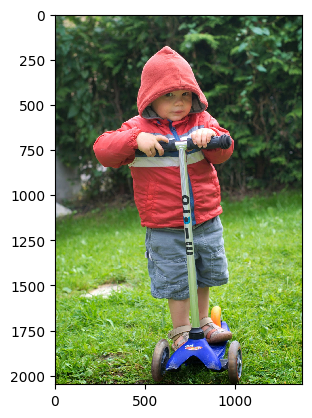

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2

def loadImagebis(src):
    img=cv2.imread(src,1)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,interpolation='nearest')
    plt.show()

loadImagebis('./Images/oscar.jpg')

By default, images in OpenCV are in BGR format. It's important to keep this in mind when working with images. For example, refer to this short [post](https://medium.com/mlearning-ai/opencv-color-in-bgr-order-you-must-know-53470396d18c).  

If you have never worked with images using OpenCV before, take the time to review the documentation for the functions used above, such as [`imread`](https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html).


## Exercise 2: Executing Some Simple Manipulations

Creating a black image of size $3 \times 3$


In [ ]:
img = # to complete

print(img)
plt.imshow(img)
plt.show()

print(img.shape)
print(img.size)
print(img.dtype)

Loading and converting an image to HSV

In [ ]:
img=cv2.imread('./Images/oscar.jpg',1)
print(img.shape, img.size,img.dtype)

# to complete



Some manipulations on the channels

In [ ]:
# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]



# Visualisation of the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

Try to select the red part in the image using the hue.

In [ ]:
# Attempt to select the red in the image using the hue channel
lower_red_hue = 
upper_red_hue = 

# Define the masked area using inRange function

# to complete

# Convert image to monotone image 
# to complete



# Mask and display the image
# to complete

Retrieving the blue channel from an RGB image using `split`.


In [ ]:
# to complete

Get pixel at position (100,100)

In [ ]:
# to complete

## Exercise 3: First manipulations with OpenCV

Write a function **loadImage(name, colorspace)** to open a grayscale or color image, return it and its size.

In [ ]:
def loadImage(path, colorspace):
    # TO COMPLETE

Write a function **countPixels(I, k)** that returns the number of gray-level pixels $k$ in the image $I$. Be careful to work with a grayscale image. Do the same for a color image and a value $k$ equivalent to a triplet $(R,G,B)$.

In [ ]:
def compterPixels(l,k):
    # TO COMPLETE
    
    

Write a function **remplacePixels(I, k1,k2)** which saves, displays and returns the image corresponding to $I$ when the $k1$ values have been changed to $k2$.

In [ ]:
def remplacePixels(I,k1,k2):
    # TO COMPLETE

Write a function **inverseImage(I)** that returns the inverse image ($k'=255-k$).


In [ ]:
def inverseImage(I):
    # TO COMPLETE



Write a function **histocompute(I)** that calculates, displays, and returns the histogram of the image *I*. For this, you can use the **cv2.calcHist** function from OpenCV or the **np.histogram** function from NumPy. A tutorial is available [here](http://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html). Make sure to thoroughly test the different parameters of the **cv2.calcHist** function.



In [ ]:
def histocompute(I):
    # TO COMPLETE



Write and test a function **threshold(I, s)** that returns a thresholded image *I* (pixels with values $> s$ are set to 255, and others are set to 0). You can use the **cv2.threshold** function. A tutorial is available [here](https://docs.opencv.org/4.7.0/d1/db7/tutorial_py_histogram_begins.html).




In [ ]:
def threshold(I,s):
    # TO COMPLETE

## Exercise 4: A simple algorithm for skin detection



The goal of this exercise is to design simple algorithms for detecting skin in images. This approach is based on several works from the literature, available on EDUNAO and in the `Articles_Documentation` folder, such as:

+ A Survey on Pixel-Based Skin Color Detection Techniques, Vezhnevets V., Sazonov V., Andreeva A, IN PROC. GRAPHICON-2003, 2003.
+ Statistical Color Models with Application to Skin Detection, Michael J. Jones, James M. Rehg, In Int. J. Comput. Vision 46, 1 (January 2002), 81-96.
+ A survey of skin-color modeling and detection methods, P. Kakumanu, S. Makrogiannis, N. Bourbakis. In Pattern Recogn. 40, 3 (March 2007), 1106-1122.

In particular, the following articles: *A survey of skin-color modeling and detection methods, P. Kakumanu, S. Makrogiannis, N. Bourbakis, IN Pattern Recognition, 2006*, and *A Survey on Pixel-Based Skin Color Detection Techniques, Vezhnevets V., Sazonov V., Andreeva A, IN PROC. GRAPHICON-2003, 2003* available in the `Articles_Documentation` folder, listing and describing the known approaches, will serve as the basis for developing your skin detection application. The general principle will involve using a database of *skin* examples and a database of *non-skin* examples, which will allow us to learn the skin color and build a model. As mentioned in the article, several questions arise:

+ The choice of the color representation space, particularly to ensure good separation between skin and non-skin.
+ How to construct the skin model (non-parametric or parametric).

### Image Dataset
For this lab, we will use a cleaned version of an existing dataset [the Pratheepan Dataset](http://web.fsktm.um.edu.my/~cschan/downloads_skin_dataset.html) available in the Data folder. You can also use the UCD Face Image Database but partially to keep a test dataset. All the images will be used to construct the skin model and the non-skin model. For the latter, additional images may be added to make the model more robust.








### A Simple First Method

The first method described in the article by Vezhnevets et al. consists of using a simple classification rule.

A pixel with (RGB) components is classified as a skin pixel if:

+ $R > 95$
+ $G > 40$
+ $B > 20$
+ $\max\{R,G,B\} - \min\{R,G,B\} > 15$
+ $|R-G| > 15$
+ $R > G$
+ $R > B$

Implement this method and test it on a few images from the dataset as well as on skin and non-skin images not present in the dataset. Comment and discuss your results.

Implementing this method will allow you to familiarize yourself with the main image manipulation functions (image traversal, pixel access, thresholding). By default, color images are in BGR, so the first component of a pixel corresponds to the blue channel rather than the red.




In [ ]:
def skindetectionsimple():
    # TO COMPLETE
    



### Non-Parametric Approach: Histogram and Skin Model

Several color spaces can be used to detect skin regions in images. In this lab, one of the goals is to compare different types of color spaces. Specifically, you will compare RGB, HSV, and Lab spaces, but you may also test and compare others.

#### Color Space Conversion

The first task is to write a program that transforms an image from one color space to another. To do this, you will need to use the **cvtColor** function from OpenCV.
+ [Tutorial](https://docs.opencv.org/4.7.0/df/d9d/tutorial_py_colorspaces.html)
+ [Documentation](http://docs.opencv.org/4.7.0/d7/d1b/group__imgproc__misc.html#ga397ae87e1288a81d2363b61574eb8cab)




In [ ]:
# TO COMPLETE



#### Construction of 2D Histograms

Initially, we will work with the Lab color space. You will only use the *a* and *b* components (color axes) and not the *L* component (luminance axis). The task is to construct two **2D color histograms**, one for *skin* and one for *non-skin*. This is a 2-dimensional array (a and b for Lab, r and g for RGB, and h and s for HSV). For each dimension, you will reduce the scale of values from 256 to 32 (reducing the quantization), and for each cell in the array, you just need to count the number of pixels with the given (a,b) pair. All *skin* pixels from all images will go into the same histogram, and similarly for *non-skin* pixels. Each histogram will also be normalized by dividing each value by the total number of skin and non-skin pixels.

For this, you can use the **calcHist** function from OpenCV. Unlike what was done earlier, you will need to:

+ Construct a 2D histogram: [documentation](http://docs.opencv.org/4.7.0/dd/d0d/tutorial_py_2d_histogram.html)
+ Use a mask to select the skin and non-skin regions (the mask being the ground truth image for the skin, and its complement for non-skin).
+ Set the accumulate flag to true (since the histogram should be calculated over a set of images corresponding to each class).

You need to construct two histograms for each color space chosen. These histograms will then be considered as a skin model and a non-skin model.



In [ ]:
# TO COMPLETE



#### Skin Detection in Images from Histograms

Several approaches can be used to detect skin in images (see the articles provided on Edunao). A simple approach is to calculate, for a pixel *p* in an image, its probability of being skin or non-skin based on its color *c* = (a,b) (note: only two components are used):

+ $p(\text{skin}|c) = p(c|\text{skin}) = HistoSkin(a,b)$
+ $p(\neg \text{skin}|c) = p(c|\neg \text{skin}) = HistoNonSkin(a,b)$

The higher probability will determine whether the pixel is a skin pixel or not.

Implement and test this method.



In [ ]:
# TO COMPLETE



#### Skin Detection in Images: Bayes Method

This decision can be refined using Bayes method:  

$p(\text{skin}|c) = \frac{p(c|\text{skin}) p(\text{skin})}{p(c|\text{skin}) p(\text{skin}) + p(c|\neg \text{skin}) p(\neg \text{skin})}$

where $p(c|\text{skin})$ and $p(c|\neg \text{skin})$ are given by the histograms, and $p(\text{skin})$ and $p(\neg \text{skin})$ are the percentages of skin and non-skin pixels in your training dataset.  

A classification rule can then be defined: classify a pixel as a skin pixel if $p(\text{skin}|c) > \Theta$, where $\Theta$ is a threshold to be determined.  

Implement and test this method.



In [ ]:
# TO COMPLETE



### Evaluation

Using the same image dataset as for your training, evaluate the percentage of skin pixels that you successfully detect (quantitative evaluation in terms of true positive rate (TP) and false positive rate (FP)). Does this seem satisfactory to you?

Now evaluate your different approaches on another dataset for which ground truth is available but that was not used to build your skin models. Analyze your results. Specifically, you should include in your report examples of images where detection works well and others where it works less well, explaining why you think this is the case.







### Discussion

How can the results you obtained be improved? Provide some ideas. What would need to be done to detect faces?  
Feel free to suggest and test new ideas. Several variants that improve the results are possible.

